In [37]:
import os
import json
from matplotlib import pyplot as plt

In [38]:
# Search for the available json files in the results folder:
rootdir = "../results/datapoints"

plot_info_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".json") and "detailed" in file:
            plot_info_files.append(os.path.join(subdir, file))
    break

# Reading the files and storing the info in dicts: 
plot_info_1e4 = {}

for file in plot_info_files:
    file_name = file.split("/")[-1].removesuffix('.json')
    
    if (file_name.startswith("less_trivial_lp") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_1e4[file_name] = json.load(json_content)
        print("Read file:", file_name)

print("Inner keys:")
print(plot_info_1e4[file_name].keys())

Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=0_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=10_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=15_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=1_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=20_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=2_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=30_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=3_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=40_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=4_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=5_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=6_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=7_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=8_detailed
Read file: less_trivial_lp_dwifob_dwifob_1e-4_m=9_detailed
Inner keys:
dict_keys(['primal_averages', 'primal_iterates', 'dual_averages', 'dual_iterates'])


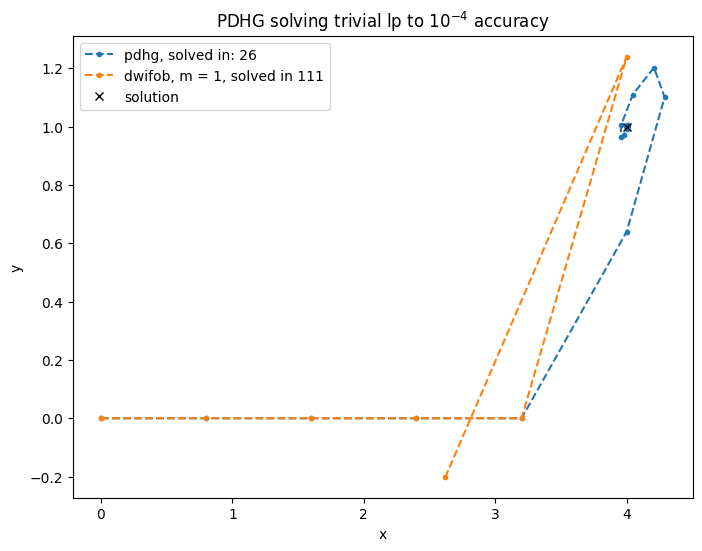

In [ ]:
# Visualizing the trivial lp solved with PDHG:
pdgh_solve = plot_info_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=0_detailed"]
dwifob_solve = plot_info_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=1_detailed"]

# print(pdgh_solve["primal_iterates"])
# print(pdgh_solve["dual_iterates"])

plt.figure(figsize=(8, 6))
iters=len(pdgh_solve["primal_iterates"])
plt.plot(pdgh_solve["primal_iterates"], pdgh_solve["dual_iterates"], ".--", label=f"pdhg, solved in: {iters}")

plt.plot(4, 1, "xk", label="solution")
plt.xlabel("x") 
plt.ylabel("y")
plt.title("PDHG solving trivial lp to $10^{-4}$ accuracy")
plt.legend();

primal_deviations: [[0.01631181816507108], [-0.18318860357163125], [0.0844850225707265], [0.13481438860739597], [-0.15759197401526442], [-0.04677912520215827], [0.18157308402228597], [-0.05346931180250636], [-0.15025304544971801], [0.13539179384148745], [0.0742513474388794], [-0.17468712785721266], [0.022519798790513478], [0.160435710105118], [-0.11037654154455964], [-0.09807144737366073], [0.16301327559073417], [0.007450619618325518], [-0.1653385374272159], [0.08343445868784549], [0.1177252543979196], [-0.1471506558371978], [-0.035605132681622555], [0.16509634273767085], [-0.05546460353543986], [-0.13284974201028965], [0.1277909510907548], [0.061204113368610064], [-0.1599901100320937], [0.027349831439006152], [0.14323627770047792], [-0.1056929905853309], [-0.08362240025852406], [0.15043069700838757], [6.84235143812694e-05], [-0.14882893331100205], [0.08165680770752257], [0.10236238180250845], [-0.13693950615580583], [-0.02601298124298778], [0.14971812587176292], [-0.056497926884075435

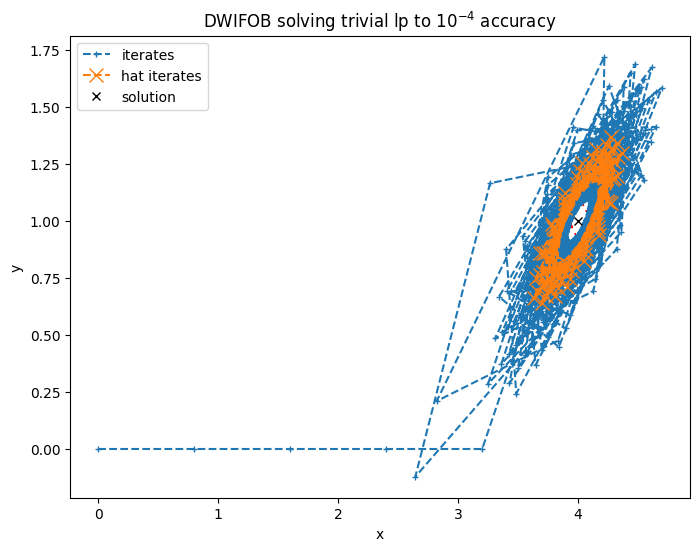

In [ ]:
dwifob_solve = plot_info_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=4_detailed"]

iters=len(dwifob_solve["primal_iterates"])
end = 10         # Up to which iterate we see.
window = 10      # How many iterates we see at the same time.

primal_plot_dwifob = dwifob_solve["primal_iterates"][:end]
dual_plot_dwifob = dwifob_solve["dual_iterates"][:end]
plt.figure(figsize=(8, 6))
plt.plot(primal_plot_dwifob, dual_plot_dwifob, "+--", label=f"iterates", markersize=5)

start = max(0, end-window)
primal_plot_dwifob = dwifob_solve["primal_iterates"][start:end]
dual_plot_dwifob = dwifob_solve["dual_iterates"][start:end]
primal_hat_dwifob = dwifob_solve["primal_hat_iterates"][start:end]
dual_hat_dwifob = dwifob_solve["dual_hat_iterates"][start:end]
primal_deviations = dwifob_solve["primal_deviations"][start:end]
dual_deviations = dwifob_solve["dual_deviations"][start:end]

plt.plot(primal_hat_dwifob, dual_hat_dwifob, "x--", label="hat iterates", markersize=10)

print("primal_deviations:", primal_deviations)
print("dual_deviations:", dual_deviations)

for i in range(len(primal_plot_dwifob)):
    if not (primal_deviations[i][0] == 0 and dual_deviations[i][0] == 0):
        plt.arrow(primal_plot_dwifob[i][0], dual_plot_dwifob[i][0], primal_deviations[i][0], dual_deviations[i][0], 
                  color="r", lw=1, fill=False, head_length=.1, head_width=.1, length_includes_head=True, overhang=1)
        
plt.plot(4, 1, "xk", label="solution")
plt.xlabel("x") 
plt.ylabel("y")
plt.title("DWIFOB solving trivial lp to $10^{-4}$ accuracy")
plt.legend();